# Deep Learning For Building Diabetes Classification Model

In [ ]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 68.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
import seaborn as sns

## Import Dataset

In [ ]:
zip_path = '/content/diabetes-health-indicators-dataset.zip'

with ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall('/content/')

In [ ]:
file_path = '/content/diabetes_binary_health_indicators_BRFSS2015.csv'

df = pd.read_csv(file_path).astype(int)
pd.set_option('display.max_columns', None)

## Data Understanding

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
df.drop(columns=['Smoker', 'Income', 'Education', 'NoDocbcCost', 'MentHlth'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  GenHlth               253680 non-null  int64
 13  PhysHlth              253680 non-null  int64
 14  DiffWalk              253680 non-null  int64
 15  Sex                   253680 non-n

## Exploratory Data Analysis

In [ ]:
df_wtht_db = df.copy()

label = df_wtht_db.pop('Diabetes_binary')

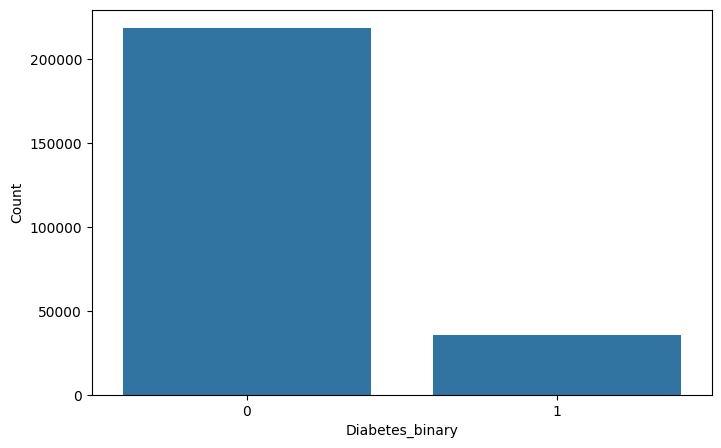

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=label, data=df)
plt.ylabel('Count')
plt.show()

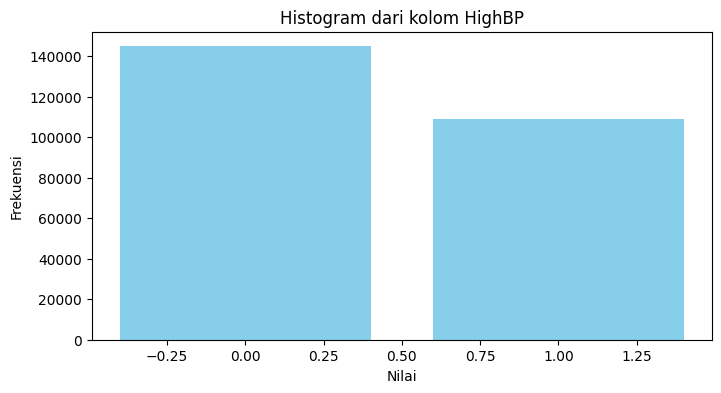

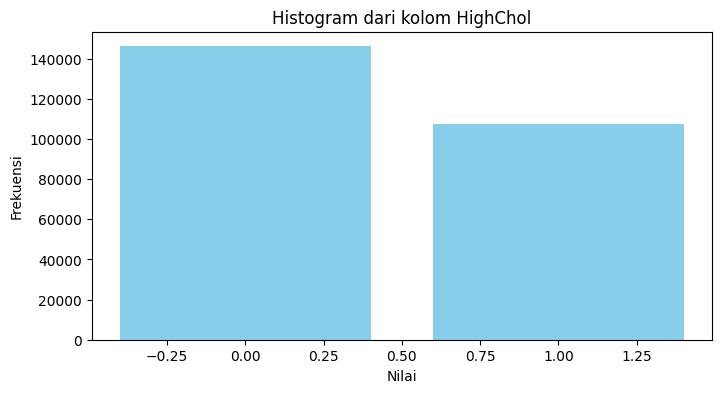

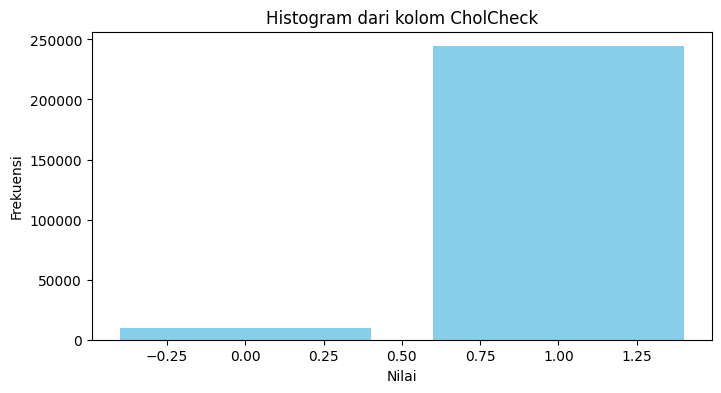

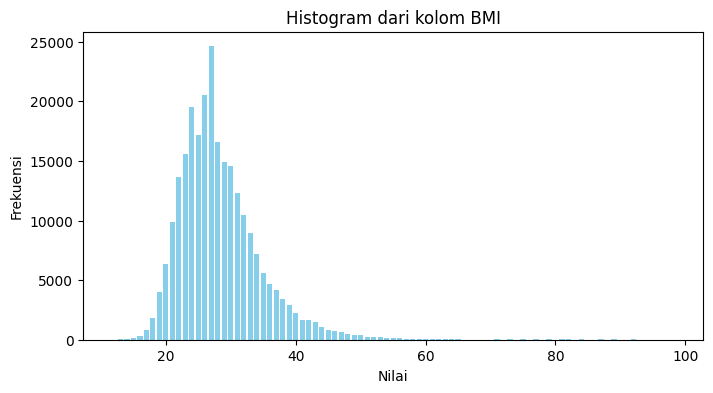

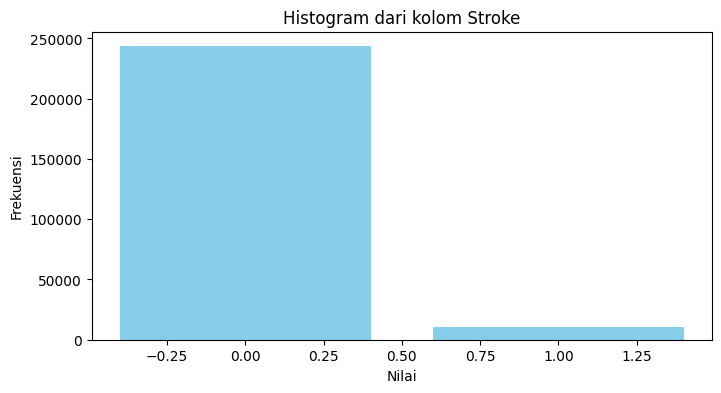

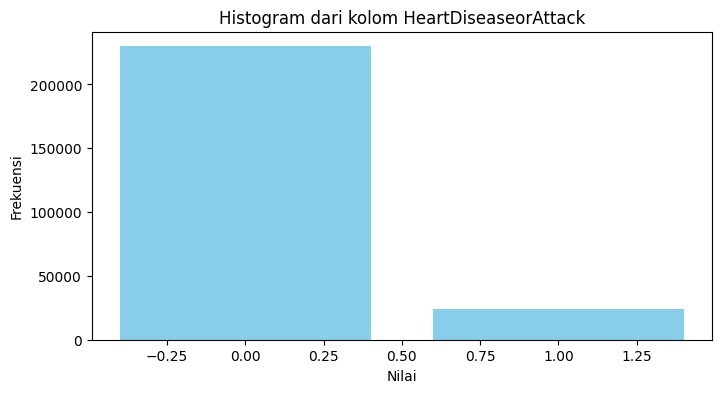

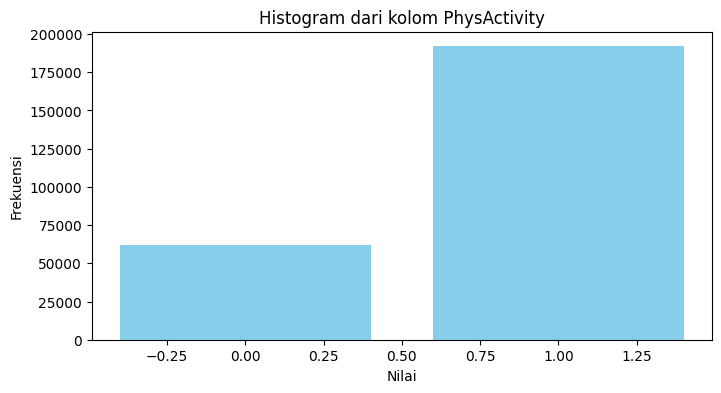

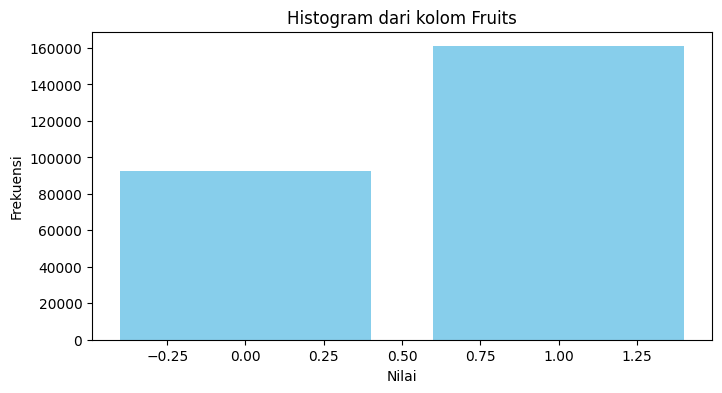

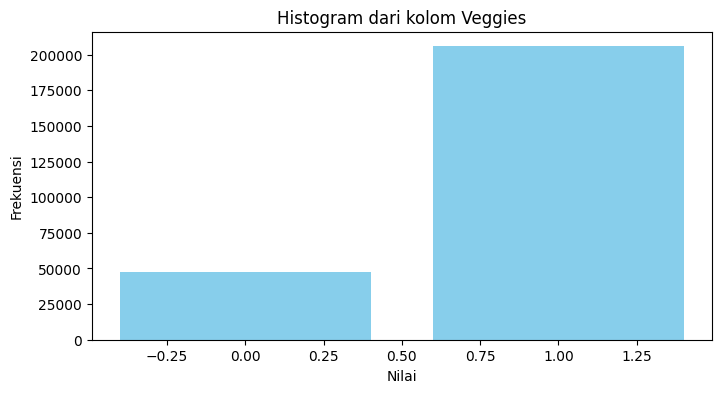

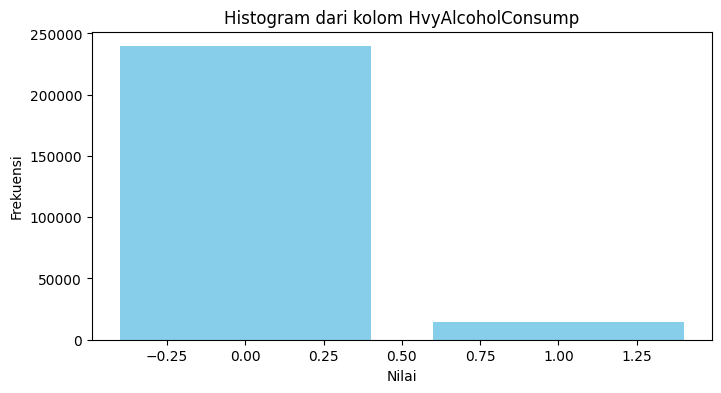

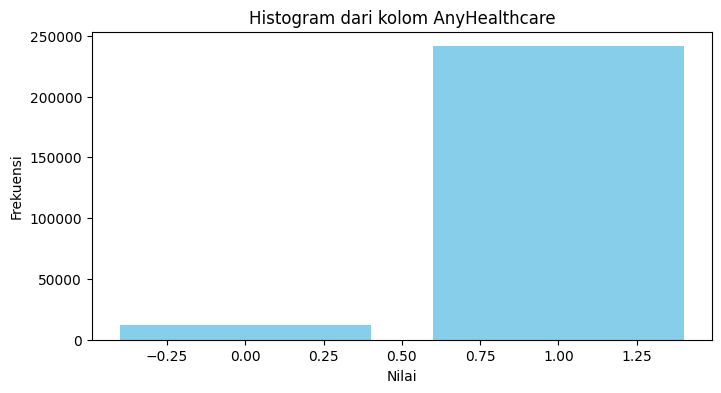

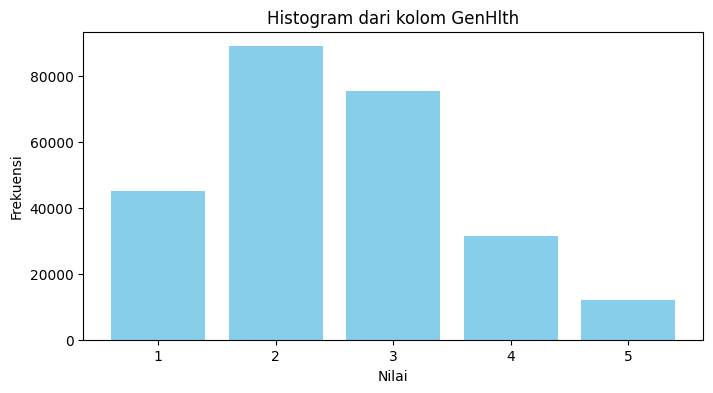

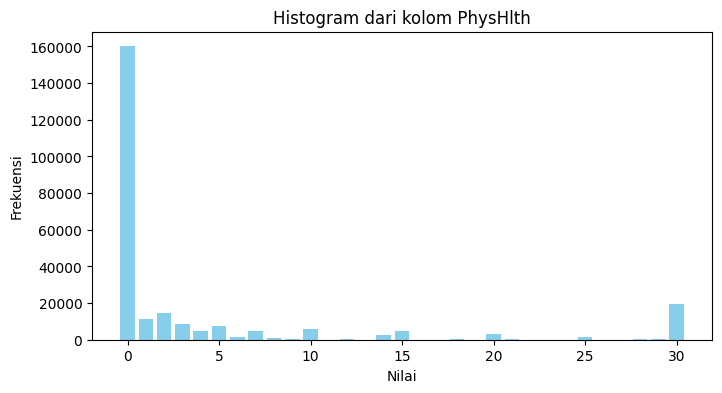

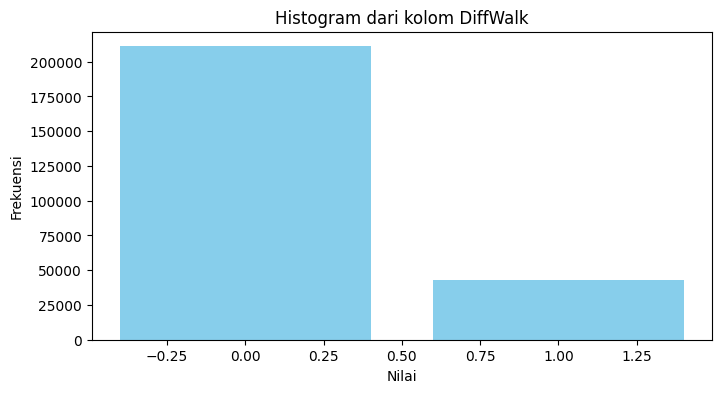

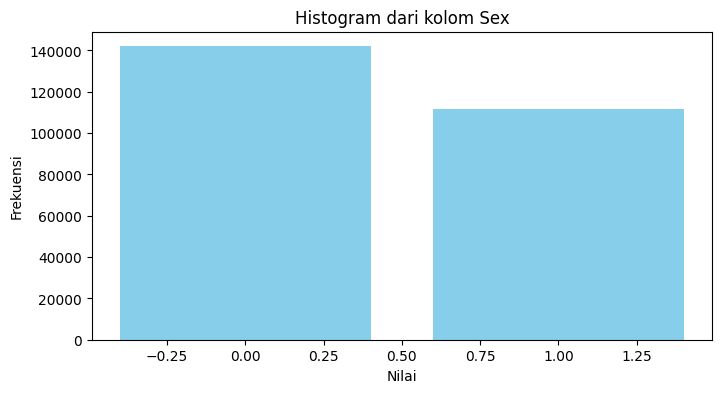

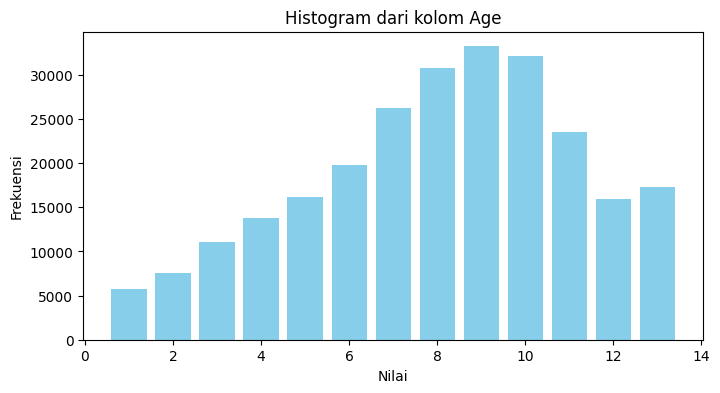

In [ ]:
for col in df_wtht_db.columns:
  value_counts = df_wtht_db[col].value_counts().sort_index()
  plt.figure(figsize=(8, 4))
  plt.bar(value_counts.index, value_counts.values, color='skyblue')
  plt.xlabel('Nilai')
  plt.ylabel('Frekuensi')
  plt.title(f'Histogram dari kolom {col}')
  plt.show()

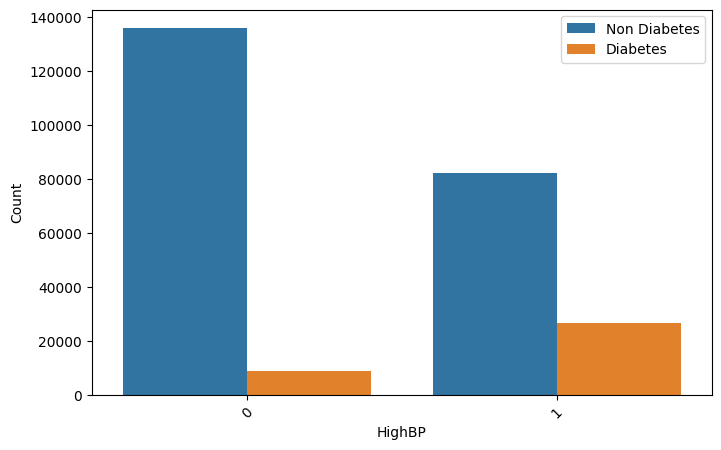

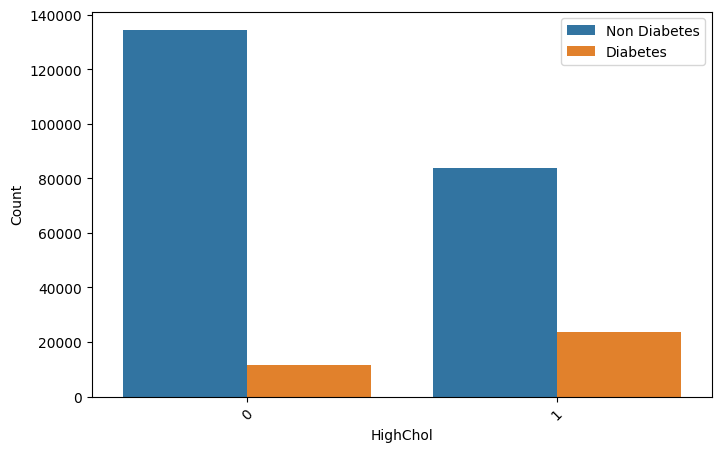

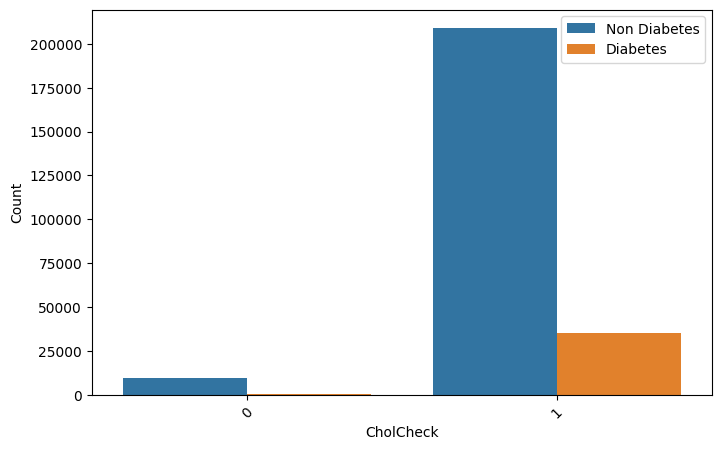

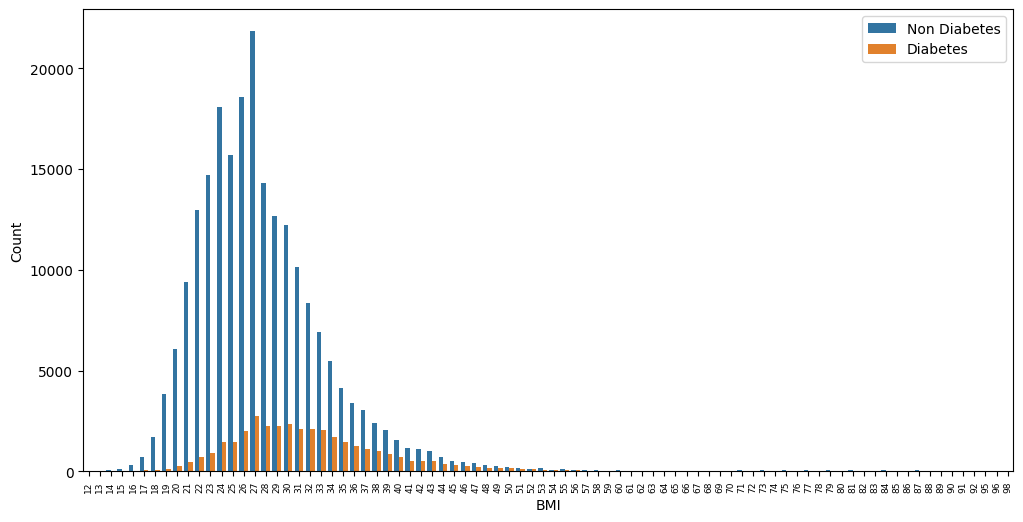

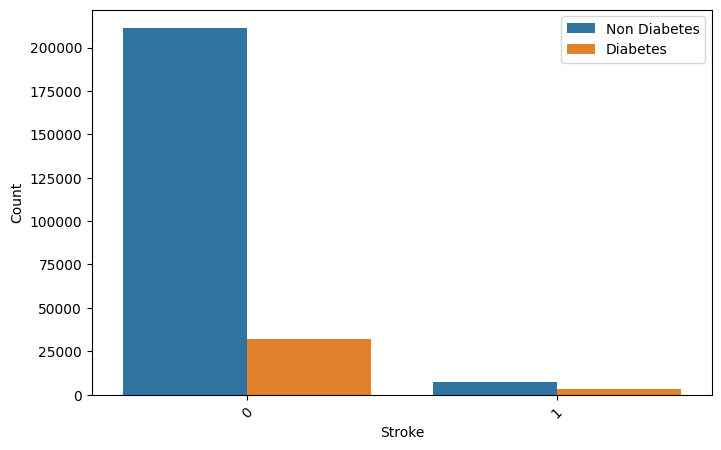

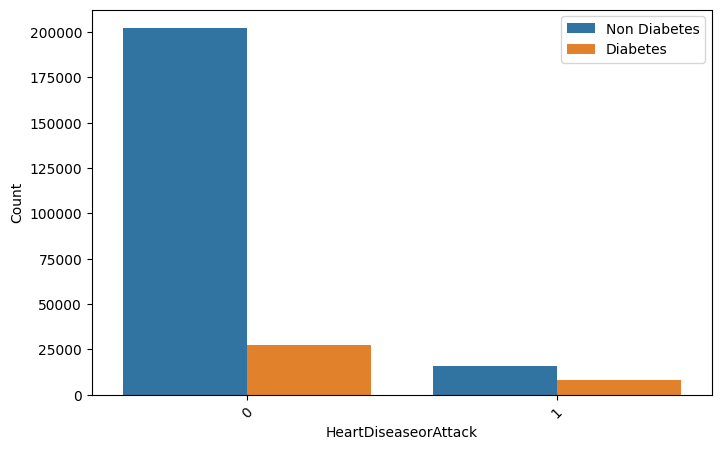

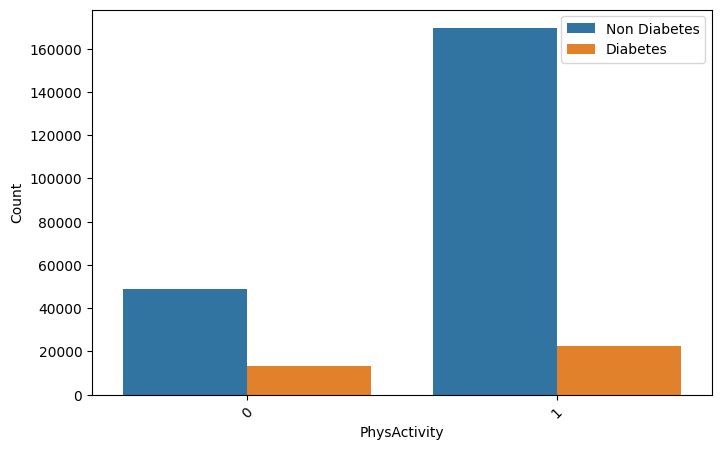

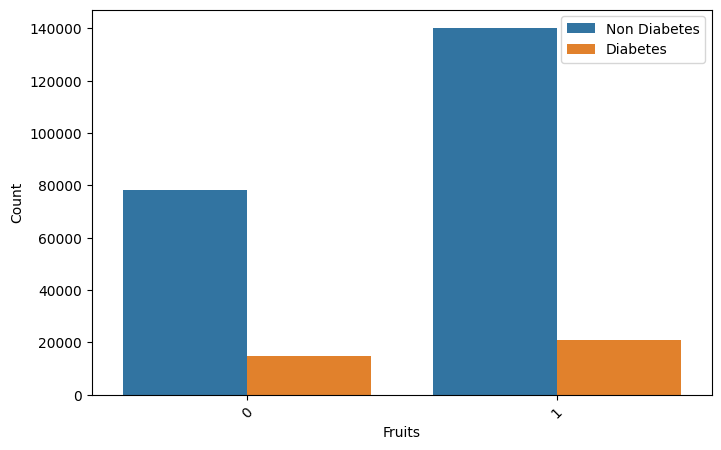

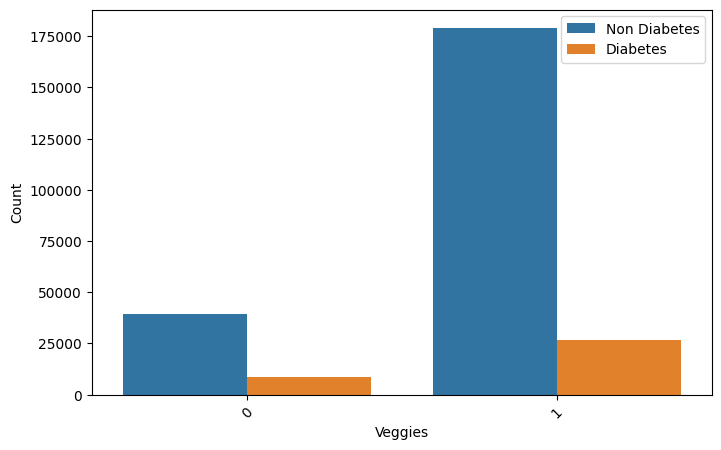

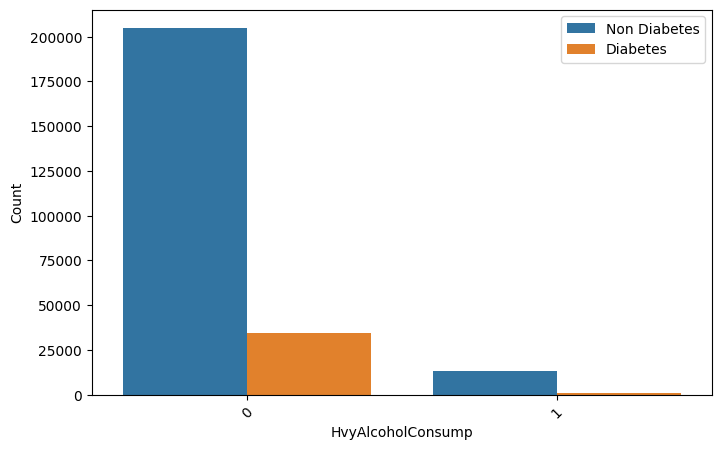

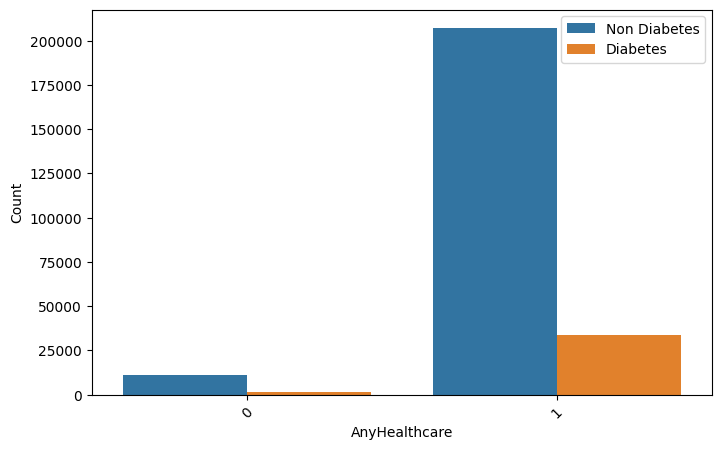

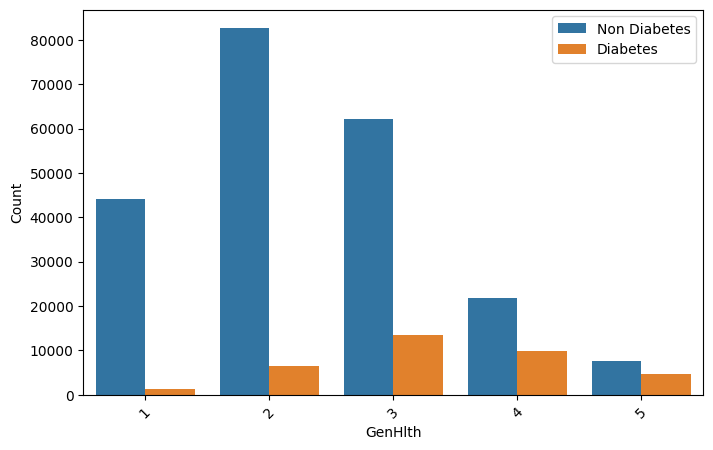

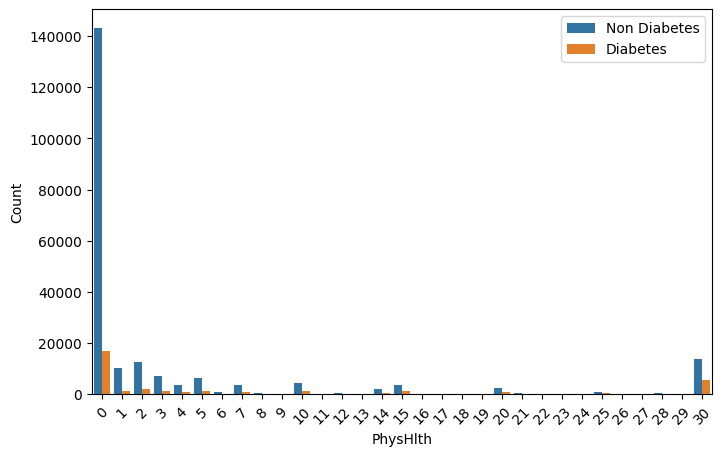

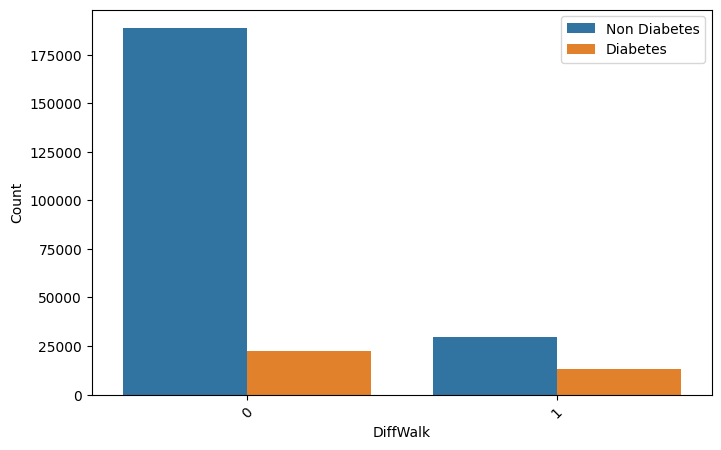

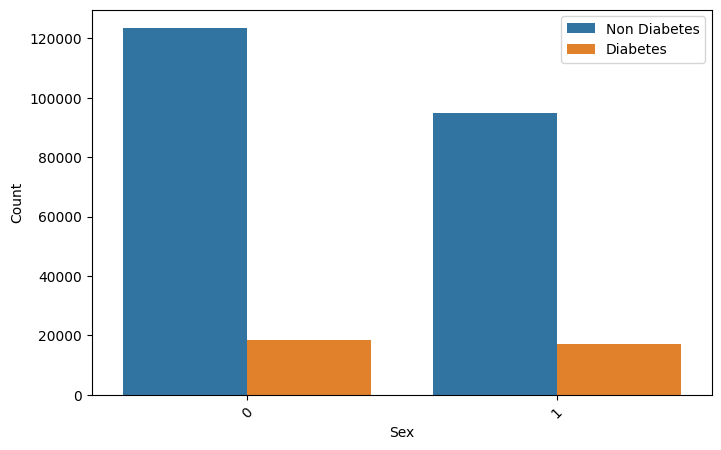

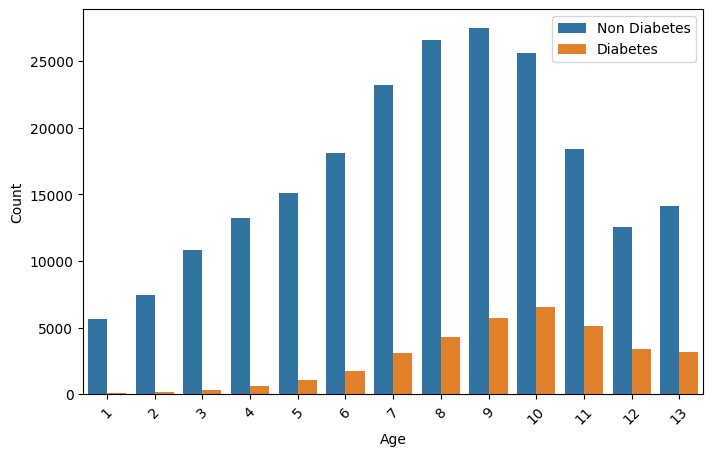

In [ ]:
for col in df_wtht_db:
    if df_wtht_db[col].nunique() < 32:
      plt.figure(figsize=(8, 5))
      sns.countplot(x=col, hue=label, data=df_wtht_db)
      plt.xticks(rotation=45)
    elif df_wtht_db[col].nunique() > 32:
      plt.figure(figsize=(12, 6))
      sns.countplot(x='BMI', hue=label, data=df_wtht_db)
      plt.xticks(rotation=90, fontsize=6.5)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(labels=['Non Diabetes', 'Diabetes'])
    plt.show()

In [ ]:
del df_wtht_db

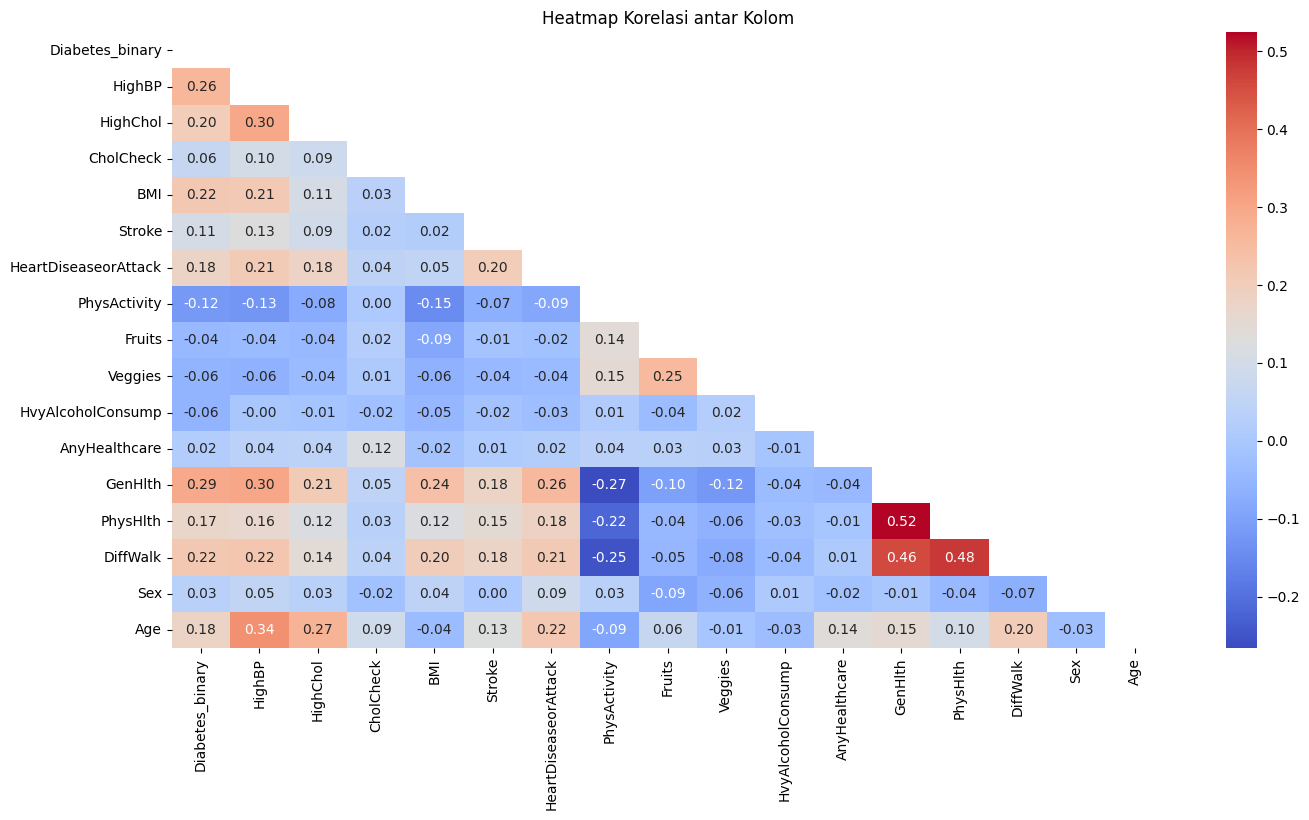

In [ ]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation))

fig = plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title("Heatmap Korelasi antar Kolom")
plt.show()

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['BMI'] = scaler.fit_transform(df[['BMI']])

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,0.325581,0,0,0,0,1,0,1,5,15,1,0,9
1,0,0,0,0,0.151163,0,0,1,0,0,0,0,3,0,0,0,7
2,0,1,1,1,0.186047,0,0,0,1,0,0,1,5,30,1,0,9
3,0,1,0,1,0.174419,0,0,1,1,1,0,1,2,0,0,0,11
4,0,1,1,1,0.139535,0,0,1,1,1,0,1,2,0,0,0,11


In [ ]:
x = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled = X_resampled.astype('float32')
X_test = X_test.astype('float32')
y_resampled = y_resampled.astype('float32')
y_test = y_test.astype('float32')

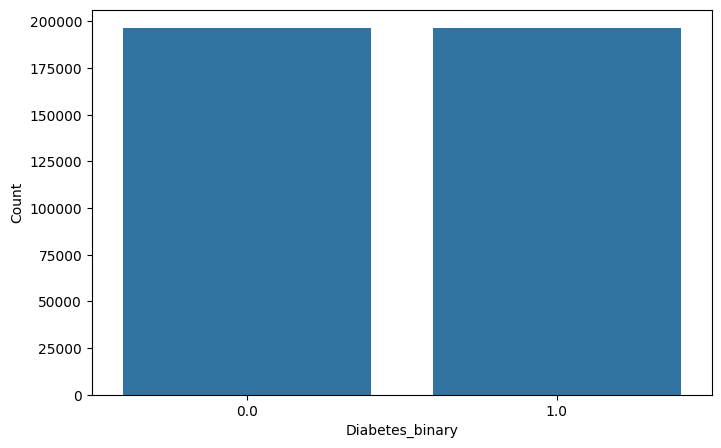

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled, data=X_resampled)
plt.ylabel('Count')
plt.show()

In [ ]:
X_resampled = np.array(X_resampled)
X_test = np.array(X_test)
y_resampled = np.array(y_resampled)
y_test = np.array(y_test)

In [ ]:
print(X_train)

        HighBP  HighChol  CholCheck       BMI  Stroke  HeartDiseaseorAttack  \
244537       0         0          1  0.232558       0                     0   
187749       1         1          1  0.290698       0                     0   
188156       0         0          1  0.220930       0                     0   
229648       0         0          1  0.162791       0                     0   
116168       0         0          1  0.174419       0                     0   
...        ...       ...        ...       ...     ...                   ...   
119879       1         0          1  0.383721       0                     0   
103694       1         1          1  0.197674       0                     0   
131932       0         1          1  0.151163       0                     0   
146867       0         0          0  0.127907       0                     0   
121958       1         0          1  0.267442       0                     0   

        PhysActivity  Fruits  Veggies  HvyAlcoholCo

In [ ]:
print(X_resampled)

[[ 0.  0.  1. ...  0.  1.  7.]
 [ 1.  1.  1. ...  0.  1.  8.]
 [ 0.  0.  1. ...  1.  1.  7.]
 ...
 [ 1.  0.  1. ...  0.  1. 10.]
 [ 0.  0.  1. ...  0.  0.  1.]
 [ 0.  0.  1. ...  0.  0.  7.]]


In [ ]:
X_resampled.shape

(392920, 16)

In [ ]:
num_features = len(X_resampled[0])
num_values = len(X_resampled)

print(num_features)
print(num_values)

16
392920


## Building and Training Model

In [ ]:
def create_model():
  model = tf.keras.Sequential([
          tf.keras.layers.Dense(512, input_shape=(num_features,), activation='relu'),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               8704      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 183297 (716.00 KB)
Trainable params: 18329

In [ ]:
history = model.fit(x=X_resampled,
          y=y_resampled,
          epochs=500,
          verbose=2,
          batch_size=512,
          validation_split=0.1,
          shuffle=True)

Epoch 1/500
691/691 - 15s - loss: 0.5298 - accuracy: 0.7281 - val_loss: 0.5040 - val_accuracy: 0.8406 - 15s/epoch - 21ms/step
Epoch 2/500
691/691 - 13s - loss: 0.5119 - accuracy: 0.7411 - val_loss: 0.5751 - val_accuracy: 0.7355 - 13s/epoch - 18ms/step
Epoch 3/500
691/691 - 11s - loss: 0.5069 - accuracy: 0.7443 - val_loss: 0.5754 - val_accuracy: 0.7338 - 11s/epoch - 16ms/step
Epoch 4/500
691/691 - 12s - loss: 0.5051 - accuracy: 0.7454 - val_loss: 0.4959 - val_accuracy: 0.8115 - 12s/epoch - 17ms/step
Epoch 5/500
691/691 - 13s - loss: 0.5018 - accuracy: 0.7476 - val_loss: 0.4837 - val_accuracy: 0.8119 - 13s/epoch - 18ms/step
Epoch 6/500
691/691 - 13s - loss: 0.5015 - accuracy: 0.7477 - val_loss: 0.5788 - val_accuracy: 0.7756 - 13s/epoch - 19ms/step
Epoch 7/500
691/691 - 13s - loss: 0.4986 - accuracy: 0.7494 - val_loss: 0.5094 - val_accuracy: 0.7909 - 13s/epoch - 18ms/step
Epoch 8/500
691/691 - 13s - loss: 0.4976 - accuracy: 0.7498 - val_loss: 0.6347 - val_accuracy: 0.7169 - 13s/epoch - 19

In [ ]:
# tf.keras.backend.clear_session()

## Model Evaluation

In [ ]:
def create_plot(history, string):
  plt.plot(history.history[string], 'r', label='Training '+string)
  plt.plot(history.history['val_'+string], 'b', label='Validation '+string)
  plt.title('Training and validation '+string)
  plt.legend()
  plt.show()
  print('')

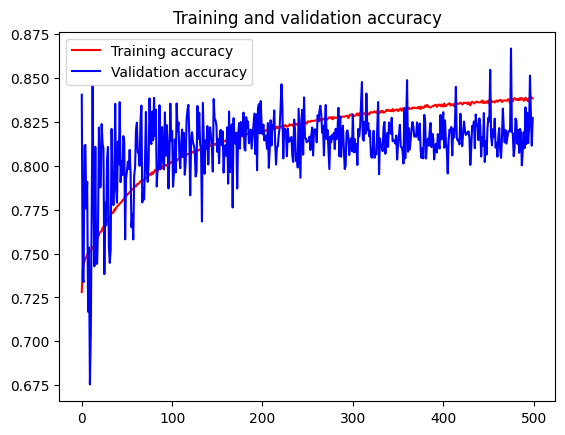

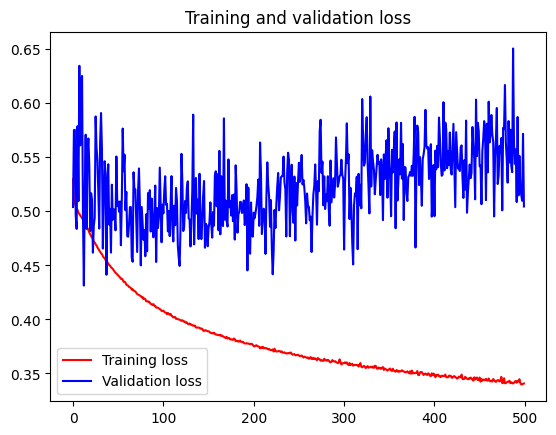

In [ ]:
create_plot(history, 'accuracy')
create_plot(history, 'loss')

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

793/793 [==============================] - 2s 2ms/step


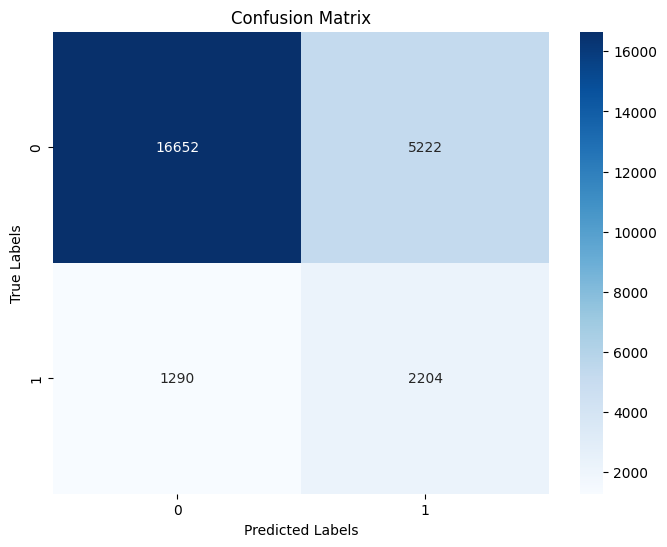

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84     21874
         1.0       0.30      0.63      0.40      3494

    accuracy                           0.74     25368
   macro avg       0.61      0.70      0.62     25368
weighted avg       0.84      0.74      0.78     25368



In [ ]:
HighBP = 1.0
HighChol = 1.0
CholCheck = 1.0
BMI = 45.0
Stroke = 1.0
HeartDiseaseorAttack = 0.0
PhysActivity = 1.0
Fruits = 1.0
Veggies = 1.0
HvyAlcoholConsump = 1.0
AnyHealthcare = 1.0
GenHlth = 3.0
PhysHlth = 7.0
DiffWalk = 1.0
Sex = 1.0
Age = 8.0

In [ ]:
data_range = np.array([[12], [98]])

scaler = MinMaxScaler()

scaler.fit(data_range)

normalized_BMI = scaler.transform([[BMI]])
normalized_BMI = normalized_BMI[0][0]

In [ ]:
normalized_BMI

0.5301204819277109

In [ ]:
data_input = np.array([HighBP, HighChol, CholCheck, normalized_BMI, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk, Sex, Age])

In [ ]:
data_input = tf.expand_dims(data_input, axis=0)
data_input.shape

TensorShape([1, 16])

In [ ]:
result = model.predict(data_input)

1/1 [==============================] - 0s 77ms/step


In [ ]:
acc = result[0][0]
acc = acc * 100

if acc > 50:
  print(f'Pasien menderita Diabetes dengan akurasi {acc}%')
else:
  print('Pasien tidak menderita diabetes')

Pasien menderita Diabetes dengan akurasi 94.54341530799866%
